#Applying K-means clustering on batsmen

In [0]:
import numpy as np
import pandas as pd

runs=pd.read_csv('/content/Ball_by_Ball.csv')
runs=runs[runs['Match_Id']>=829710]
runs.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
108843,829710,1,1,1,7,1,57,1,254,232,0,,,,,
108844,829710,1,1,2,7,1,57,1,254,232,1,,,,,
108845,829710,1,1,3,7,1,254,2,57,232,1,,,,,
108846,829710,1,1,4,7,1,57,1,254,232,1,,,,,
108847,829710,1,1,5,7,1,254,2,57,232,0,legbyes,1,,,


In [0]:
runs["Extra_Runs"] = pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"] = runs["Extra_Runs"].fillna(0)

runs["Batsman_Scored"] = pd.to_numeric(runs["Batsman_Scored"], errors="coerce")
runs["Batsman_Scored"] = runs["Batsman_Scored"].fillna(0)
runs.head(10)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
108843,829710,1,1,1,7,1,57,1,254,232,0.0,,0.0,,,
108844,829710,1,1,2,7,1,57,1,254,232,1.0,,0.0,,,
108845,829710,1,1,3,7,1,254,2,57,232,1.0,,0.0,,,
108846,829710,1,1,4,7,1,57,1,254,232,1.0,,0.0,,,
108847,829710,1,1,5,7,1,254,2,57,232,0.0,legbyes,1.0,,,
108848,829710,1,1,6,7,1,57,1,254,232,0.0,,0.0,,,
108849,829710,1,2,1,7,1,254,2,57,190,4.0,,0.0,,,
108850,829710,1,2,2,7,1,254,2,57,190,0.0,,0.0,,,
108851,829710,1,2,3,7,1,254,2,57,190,0.0,,0.0,254,caught,232
108852,829710,1,2,4,7,1,57,1,207,190,0.0,,0.0,,,


In [0]:
Players = pd.read_csv("/content/Player.csv",encoding= 'unicode_escape')
Players = Players[["Player_Id", "Player_Name"]]
Players.head()

,Player_Id,Player_Name
0,1,SC Ganguly
1,2,BB McCullum
2,3,RT Ponting
3,4,DJ Hussey
4,5,Mohammad Hafeez


In [0]:
final_ds = runs[['Team_Batting_Id', 'Striker_Id']]  #ds.batsman, ds.batsman_team

a_ds = final_ds.drop_duplicates(['Team_Batting_Id', 'Striker_Id'])[['Team_Batting_Id', 'Striker_Id']]

# print(a_ds.loc[a_ds['Striker_Id'] == 57]['Striker_Id'])
# print(a_ds)

mapping = {}

for index, row in a_ds.iterrows():
    mapping[row['Striker_Id']] = row['Team_Batting_Id']

print(mapping)

A = []
B = []
F = []

for i in runs["Striker_Id"].unique():
    a = runs["Batsman_Scored"][runs["Striker_Id"] == i].sum()
    b = runs["Match_Id"][runs["Striker_Id"] == i].count()
    A.append(a)
    B.append(b)

Batsmen = pd.DataFrame({"Player_names": runs["Striker_Id"].unique()})
Batsmen["Runs"] = A
Batsmen["Balls_played"] = B

# Calculating strike rate using the formula (strike_rate = runs per 100 balls faced)

Batsmen["Strike_Rate"] = (Batsmen["Runs"] * 100 / Batsmen["Balls_played"]).round(2)

# Since we have to assess batsmen, the players with very low strike rates are not required to be considered
# as they tend to bat very few times and are usually bowlers/fielders.

Batsmen = Batsmen[Batsmen["Strike_Rate"] > 60]
Batsmen = Batsmen[Batsmen["Strike_Rate"] < 150]

# Applying another filtering - run rate, which is equal to runs per over(or per 6 balls).

Batsmen = Batsmen[(Batsmen["Runs"]*6/Batsmen["Balls_played"]) > 6]

Batsmen['Team_Batting_Id'] = Batsmen.apply(lambda row: mapping.get(row.Player_names), axis=1)

Batsmen.head()

{57: 7, 254: 13, 207: 11, 208: 7, 372: 7, 46: 1, 40: 1, 96: 1, 308: 1, 31: 1, 147: 13, 2: 13, 21: 13, 303: 12, 35: 13, 20: 12, 71: 13, 201: 12, 364: 4, 260: 6, 360: 6, 109: 12, 393: 6, 237: 2, 27: 11, 154: 6, 371: 6, 136: 6, 386: 6, 85: 12, 351: 6, 306: 12, 339: 6, 255: 2, 310: 13, 394: 11, 350: 6, 41: 4, 62: 4, 185: 4, 305: 4, 374: 4, 320: 4, 197: 12, 357: 4, 395: 4, 392: 4, 187: 11, 42: 11, 354: 2, 183: 11, 161: 11, 396: 11, 166: 11, 366: 2, 334: 1, 276: 1, 162: 2, 8: 2, 88: 13, 236: 2, 110: 2, 362: 2, 397: 2, 311: 2, 246: 2, 191: 6, 377: 7, 356: 4, 221: 7, 398: 7, 50: 7, 296: 2, 382: 2, 17: 7, 262: 7, 388: 7, 322: 6, 73: 11, 399: 3, 216: 11, 325: 11, 383: 7, 81: 7, 14: 13, 280: 12, 329: 4, 284: 1, 67: 1, 32: 2, 400: 7, 214: 2, 380: 2, 401: 2, 140: 2, 87: 6, 100: 4, 163: 11, 402: 2, 378: 2, 403: 7, 194: 7, 80: 13, 370: 13, 340: 11, 94: 13, 299: 11, 367: 4, 293: 6, 404: 6, 345: 4, 192: 1, 79: 12, 405: 1, 232: 1, 316: 1, 406: 4, 233: 5, 373: 2, 228: 11, 315: 1, 355: 6, 89: 12, 314: 12,

,Player_names,Runs,Balls_played,Strike_Rate,Team_Batting_Id
0,57,971.0,711,136.57,7
1,254,416.0,344,120.93,13
3,208,615.0,479,128.39,7
4,372,114.0,98,116.33,7
5,46,758.0,587,129.13,1


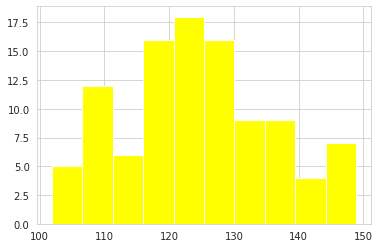

In [0]:
# Checking the distribution of batsmen by plotting a histogram.

Batsmen["Strike_Rate"].hist(color="yellow")

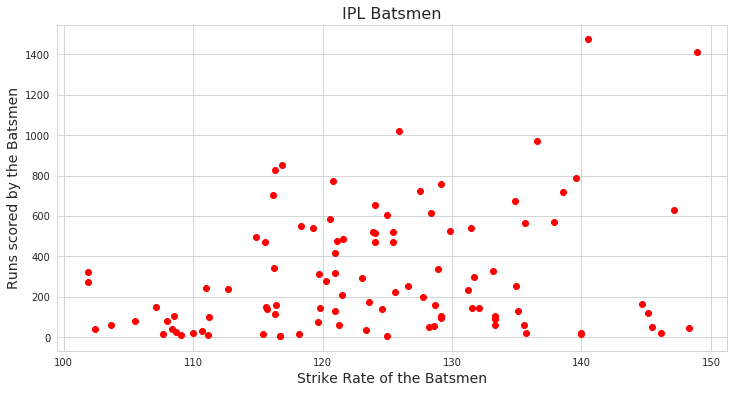

In [0]:
#K-Means Clustering

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Strike_Rate"], Batsmen["Runs"], color="red")
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Strike_Rate", "Runs"]])
Batsmen["cluster"] = kmeans.labels_
labels=kmeans.predict(Batsmen[["Strike_Rate", "Runs"]])
labels

array([4, 0, 0, 1, 4, 4, 0, 3, 4, 4, 4, 4, 0, 3, 0, 3, 1, 1, 3, 1, 0, 3,
       0, 0, 4, 0, 0, 0, 1, 3, 3, 1, 0, 4, 3, 3, 0, 3, 2, 4, 0, 3, 1, 1,
       1, 1, 4, 2, 0, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 3, 3, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
Batsmen["cluster"]

0      4
1      0
3      0
4      1
5      4
      ..
154    1
158    1
159    1
161    1
164    1
Name: cluster, Length: 102, dtype: int32

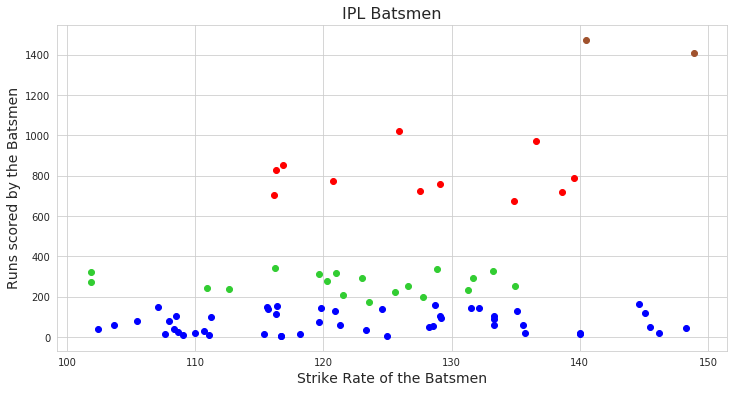

In [0]:
fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "indigo"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_Rate"], clustered_Batsmen["Runs"], color=colors[r-1])
    
plt.title("IPL Batsmen", fontsize=16)
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
    
plt.show()

In [0]:
Batsmen = Batsmen.rename(columns={"Player_names": "Player_Id"})

Batsmen = Batsmen[Batsmen.columns].merge(Players, "left")
Batsmen.head(15)

,Player_Id,Runs,Balls_played,Strike_Rate,Team_Batting_Id,cluster,Player_Name
0,57,971.0,711,136.57,7,4,RG Sharma
1,254,416.0,344,120.93,13,0,AJ Finch
2,208,615.0,479,128.39,7,0,AT Rayudu
3,372,114.0,98,116.33,7,1,CJ Anderson
4,46,758.0,587,129.13,1,4,RV Uthappa
5,40,828.0,712,116.29,1,4,G Gambhir
6,96,473.0,377,125.46,1,0,MK Pandey
7,308,339.0,263,128.90,1,3,SA Yadav
8,31,673.0,499,134.87,1,4,YK Pathan
9,147,723.0,567,127.51,13,4,DR Smith


In [0]:
batting_team_id={'RR': 12, 'CSK': 13,'MI': 7, 'KKR': 1, 'SRH': 11, 'DC': 6, 'RCB':2,'KXIP':4}
Batsmen.sort_values(by=['cluster', 'Runs', 'Strike_Rate'], ascending=False)

,Player_Id,Runs,Balls_played,Strike_Rate,Team_Batting_Id,cluster,Player_Name
24,85,1020.0,810,125.93,12,4,AM Rahane
0,57,971.0,711,136.57,7,4,RG Sharma
39,42,854.0,731,116.83,11,4,S Dhawan
5,40,828.0,712,116.29,1,4,G Gambhir
10,2,790.0,566,139.58,13,4,BB McCullum
...,...,...,...,...,...,...,...
48,88,476.0,393,121.12,13,0,KD Karthik
6,96,473.0,377,125.46,1,0,MK Pandey
73,163,469.0,378,124.07,11,0,MC Henriques
20,393,469.0,406,115.52,6,0,SS Iyer


In [0]:
Batsmen['cluster'].value_counts()

1    49
0    21
3    19
4    11
2     2
Name: cluster, dtype: int64

In [0]:
top_batsmen = Batsmen[Batsmen['Team_Batting_Id'] == 4]
top_batsmen.head(6)

,Player_Id,Runs,Balls_played,Strike_Rate,Team_Batting_Id,cluster,Player_Name
17,364,60.0,45,133.33,4,1,MM Sharma
31,41,99.0,89,111.24,4,1,V Sehwag
32,62,519.0,419,123.87,4,0,WP Saha
33,185,704.0,606,116.17,4,4,M Vijay
34,305,325.0,244,133.20,4,3,GJ Maxwell
35,374,317.0,262,120.99,4,3,AR Patel


#Applying K-means clustering on bowlers

In [0]:
C = []
E = []

for j in runs["Bowler_Id"].unique():
    c = runs["Batsman_Scored"][runs["Bowler_Id"] == j].sum() + runs["Extra_Runs"][runs["Bowler_Id"] == j].sum()
    
    e = runs["Over_Id"][runs["Bowler_Id"] == j].count()/6
    
    C.append(c)
    E.append(e)
    
Bowlers = pd.DataFrame({"Bowler_names": runs["Bowler_Id"].unique()})

Bowlers["Runs"] = C
Bowlers["Over_count"] = E

# Economy rate can be calculated by dividing the total runs conceded by the number of overs bowled.

Bowlers["Econ_Rate"] = (Bowlers["Runs"] / Bowlers["Over_count"]).round(2)

final_ds = runs[['Team_Bowling_Id', 'Bowler_Id']] 

a_ds = final_ds.drop_duplicates(['Team_Bowling_Id', 'Bowler_Id'])[['Team_Bowling_Id', 'Bowler_Id']]

# print(a_ds.loc[a_ds['Striker_Id'] == 57]['Striker_Id'])
# print(a_ds)

mapping = {}

for index, row in a_ds.iterrows():
    mapping[row['Bowler_Id']] = row['Team_Bowling_Id']

Bowlers['Team_Bowling_Id'] = Bowlers.apply(lambda row: mapping.get(row.Bowler_names), axis=1)

Bowlers.head()

,Bowler_names,Runs,Over_count,Econ_Rate,Team_Bowling_Id
0,232,633.0,71.500000,8.85,1
1,190,511.0,65.666667,7.78,1
2,276,370.0,46.500000,7.96,1
3,315,556.0,76.333333,7.28,1
4,334,633.0,79.666667,7.95,1


In [0]:
Bowlers.dtypes

Bowler_names         int64
Runs               float64
Over_count         float64
Econ_Rate          float64
Team_Bowling_Id      int64
dtype: object

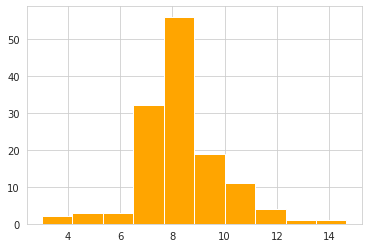

In [0]:

# Checking the distribution of batsmen by plotting a histogram.

Bowlers["Econ_Rate"].hist(color="orange")

In [0]:
Bowlers = Bowlers[(Bowlers["Econ_Rate"] > 4) & (Bowlers["Econ_Rate"] < 10.5)]

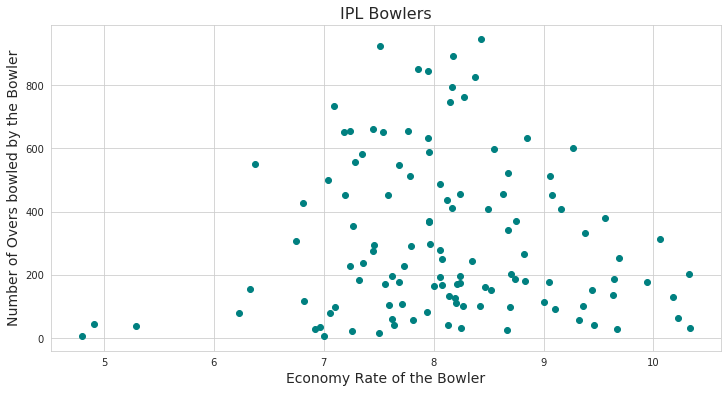

In [0]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,6))
plt.scatter(Bowlers["Econ_Rate"], Bowlers["Runs"], color="teal")
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
plt.title("IPL Bowlers", fontsize=16)
plt.show()

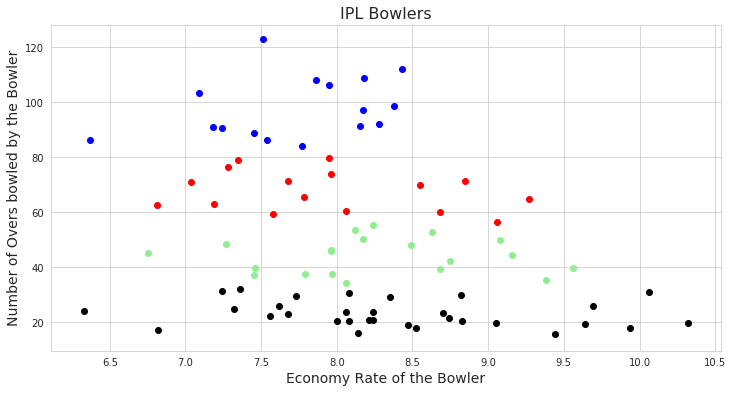

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Bowlers[["Econ_Rate", "Over_count"]])
Bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "lightgreen", "black", "red"]

for r in range(1,5):
    clustered_Bowlers = Bowlers[Bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Over_count"], color=colors[r-1])
    
plt.title("IPL Bowlers", fontsize=16)
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
    
plt.show()

In [0]:
bowling_team_id={'RR': 12, 'CSK': 13,'MI': 7, 'KKR': 1, 'SRH': 11, 'DC': 6, 'RCB':2,'KXIP':4}
Bowlers = Bowlers.rename(columns={"Bowler_names": "Player_Id"})
Bowlers.head()


,Player_Id,Runs,Over_count,Econ_Rate,Team_Bowling_Id,cluster,Player_Name
0,460,427.0,62.666667,6.81,11,4,Mustafizur Rahman
1,15,500.0,71.000000,7.04,6,4,Z Khan
2,194,453.0,63.000000,7.19,7,4,SL Malinga
3,315,556.0,76.333333,7.28,1,4,SP Narine
4,163,582.0,79.166667,7.35,11,4,MC Henriques


In [0]:
Bowlers = Bowlers[Bowlers.columns].merge(Players, "left")
Bowlers.head(10)

,Player_Id,Runs,Over_count,Econ_Rate,Team_Bowling_Id,cluster,Player_Name
0,460,427.0,62.666667,6.81,11,4,Mustafizur Rahman
1,15,500.0,71.000000,7.04,6,4,Z Khan
2,194,453.0,63.000000,7.19,7,4,SL Malinga
3,315,556.0,76.333333,7.28,1,4,SP Narine
4,163,582.0,79.166667,7.35,11,4,MC Henriques
5,371,451.0,59.500000,7.58,6,4,NM Coulter-Nile
6,67,548.0,71.333333,7.68,1,4,PP Chawla
7,190,511.0,65.666667,7.78,1,4,M Morkel
8,334,633.0,79.666667,7.95,1,4,AD Russell
9,377,588.0,73.833333,7.96,7,4,TG Southee


In [0]:
Bowlers = Bowlers.sort_values(by=['cluster', 'Econ_Rate', 'Over_count'], ascending=[False, True,False])
top_bowlers = Bowlers[Bowlers['Team_Bowling_Id'] == 4]
top_bowlers.head(4)

,Player_Id,Runs,Over_count,Econ_Rate,Team_Bowling_Id,cluster,Player_Name
23,395,521.0,60.000000,8.68,4,4,Anureet Singh
52,356,167.0,20.666667,8.08,4,3,R Dhawan
97,412,152.0,17.833333,8.52,4,3,P Sahu
96,409,203.0,23.333333,8.70,4,3,MP Stoinis


In [0]:
df_matches = pd.read_csv('/content/matches.csv')
df_deliveries = pd.read_csv('/content/deliveries.csv')

# Take the dismissal kind as stumped and count the number of stumping a fielder(wicket-keeper) has done
wicket_keeper_stumping = df_deliveries[df_deliveries['dismissal_kind'] == 'stumped']['fielder'].value_counts().reset_index()
# Renaming the column accordingly
wicket_keeper_stumping.rename(columns={'index':'wicket_keeper','fielder':'stumping'}, inplace=True)
# Get first 5 rows

wicket_keeper_list = wicket_keeper_stumping['wicket_keeper'].tolist()


# Take the dismissal kind as caught and fielder should be present in the wicket_keeper_list
wicket_keeper_catches = df_deliveries[(df_deliveries['dismissal_kind']=='caught') & (df_deliveries['fielder'].isin(wicket_keeper_list))]['fielder'].value_counts().reset_index()
# Rename the columns accordingly
wicket_keeper_catches.rename(columns={'index':'wicket_keeper','fielder':'catches'}, inplace=True)


# Left Outer Join on wicket_keeper_stumping and wicket_keeper_catches
wicket_keeper_dismissals = pd.merge(wicket_keeper_stumping,wicket_keeper_catches,on='wicket_keeper',how='outer')
# Convert the NaN values to 0
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.fillna(0)
# Convert the data-type of catches to integer (from float)
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.astype(int)
# Get the total by adding number of stumping and catches
wicket_keeper_dismissals['total'] = wicket_keeper_dismissals.stumping + wicket_keeper_dismissals.catches
# Sort the DataFrame by total
wicket_keeper_dismissals = wicket_keeper_dismissals.sort_values(['total'], ascending=False).reset_index()
# Drop the index column
wicket_keeper_dismissals.drop('index', axis=1, inplace=True)
# Get first 5 rows


final_ds = df_deliveries[['match_id', 'batsman']]
a_ds = final_ds.drop_duplicates(['match_id', 'batsman'])[['match_id', 'batsman']]

# print(a_ds)

batsmans = list(a_ds['batsman'])

batsman_counts = {}

for player in batsmans:
    batsman_counts[player] = batsmans.count(player)

# print(batsman_counts)

wicket_keeper_dismissals['matches'] = wicket_keeper_dismissals.apply(lambda row: batsman_counts.get(row.wicket_keeper), axis=1)
wicket_keeper_dismissals['Dismissals per Match'] = wicket_keeper_dismissals.apply(lambda row: row.total / row.matches, axis=1)

print(wicket_keeper_dismissals.head(10))

    wicket_keeper  stumping  catches  total  matches  Dismissals per Match
0      KD Karthik        29      109    138    162.0              0.851852
1        MS Dhoni        38       98    136    170.0              0.800000
2      RV Uthappa        32       84    116    170.0              0.682353
3  AB de Villiers         7       93    100    142.0              0.704225
4        PA Patel        16       69     85    136.0              0.625000
5         WP Saha        18       60     78     93.0              0.838710
6         NV Ojha        10       65     75     94.0              0.797872
7    AC Gilchrist        16       51     67     80.0              0.837500
8       AT Rayudu         2       53     55    138.0              0.398551
9   KC Sangakkara         9       45     54     68.0              0.794118


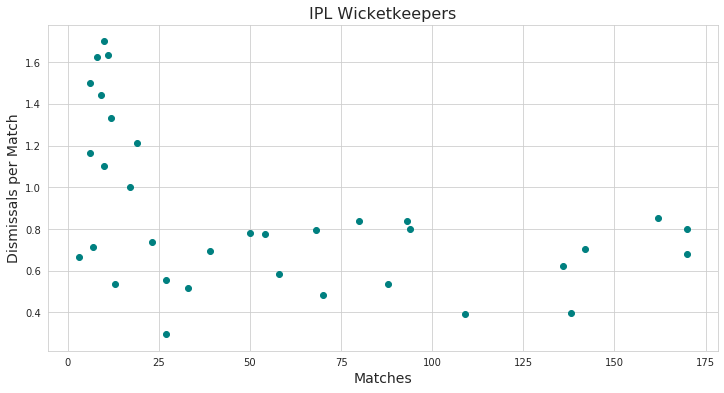

In [0]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,6))
plt.scatter(wicket_keeper_dismissals["matches"], wicket_keeper_dismissals["Dismissals per Match"], color="teal")
plt.xlabel("Matches", fontsize=14)
plt.ylabel("Dismissals per Match", fontsize=14)
plt.title("IPL Wicketkeepers", fontsize=16)
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(wicket_keeper_dismissals["matches", "Dismissals per Match"])
wicket_keeper_dismissals["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "lightgreen"]

for r in range(1,3):
    clustered_wk = wicket_keeper_dismissals[wicket_keeper_dismissals["cluster"] == r]
    plt.scatter(clustered_wk["matches"], clustered_wk["Dismissals per Match"], color=colors[r-1])
    
plt.title("IPL Wicketkeepers", fontsize=16)
plt.xlabel("Matches played by WK", fontsize=14)
plt.ylabel("Dismissals per Match by WK", fontsize=14)
    
plt.show()

KeyError: ignored